In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  

## 数据集读取

In [7]:
df = pd.read_csv("mnist.csv",header=None)
label = df[0]
df = df.loc[:,1:]
mean_df = df.mean()
centred_df = df.sub(mean_df,axis=1)
label_num = label.unique()

In [8]:
centred_df

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA降维

In [9]:
#PCA算法实现
def PCA(X,dim=2) :
    mean_df = X.mean()
    centred_df = X.sub(mean_df,axis=1)
    cov_centred_df = np.dot(centred_df.T,centred_df)
    PCA_eigenvalues,PCA_eigenvector = np.linalg.eigh(cov_centred_df)
    PCA_eigenvector_T = PCA_eigenvector.T
    PCA_eigenvector_T = np.flip(PCA_eigenvector_T,axis=0) 
    PCA_eigenvector_T_cut = PCA_eigenvector_T[:dim]
    PCA_Result = pd.DataFrame(np.dot(centred_df,PCA_eigenvector_T_cut.T))
    return PCA_Result

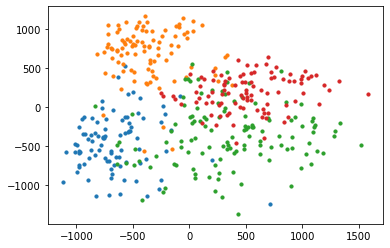

In [12]:
PCA_Result = np.array(PCA(df,2)) #降维至2
for i in label_num :
    temp = PCA_Result[label == i]
    plt.scatter(x=temp[:,0],y=temp[:,1],s=10)

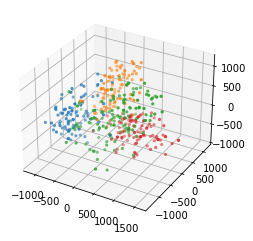

In [13]:
PCA_Result = np.array(PCA(df,3)) #降维至3
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d') 
for i in label_num :
    temp = PCA_Result[label == i]
    ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], s=5)  

In [14]:
# sklearn中的PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(df)
X_pca = pca1.transform(df)

In [15]:
pd.DataFrame(X_pca)

,0,1
0,-673.858768,29.991674
1,-254.873949,936.708960
2,-358.126280,-781.144331
3,-867.130782,358.527096
4,-582.996101,934.002209
...,...,...
403,-440.585969,712.932655
404,255.758885,-55.149457
405,294.652105,494.400226
406,-721.124827,-1058.315113


In [16]:
pca1 = PCA(n_components=3)
pca1.fit(df)
X_pca = pca1.transform(df)

In [17]:
pd.DataFrame(X_pca)

,0,1,2
0,-673.858997,29.991255,314.933356
1,-254.873546,936.708926,21.008859
2,-358.126846,-781.143334,607.749555
3,-867.131274,358.527137,-268.728342
4,-582.996218,934.002708,185.550485
...,...,...,...
403,-440.586144,712.933125,183.967394
404,255.758344,-55.148862,28.603906
405,294.652569,494.402214,190.898651
406,-721.124646,-1058.315446,89.119551


## MDS降维

In [18]:
def MDS(df, dim=2) :
    B = np.array([np.zeros(len(df))]*len(df))
    dist_X = np.array([np.zeros(len(df))]*len(df))
    centred_df_np = np.array(centred_df)
    for i in range(len(df)) :
        for j in range(len(df)) :
            dist_X[i][j] = np.sum(abs(centred_df_np[i]-centred_df_np[j])**6)**(1/3)
            #dist_X[i][j] = np.max(centred_df_np[i]-centred_df_np[j])**2
            #dist_X[i][j] = np.sum((centred_df_np[i]-centred_df_np[j])**2)
            #dist_X[i][j] = np.sum(np.sum(centred_df_np[i]-centred_df_np[j]))**2
    dist_X_sum = dist_X.sum(axis = 0)/len(df)
    dist_X_sum_all = dist_X.sum()/(len(df)**2)
    for i in range(len(df)) :
        for j in range(len(df)) :
            B[i][j] = -0.5*(dist_X[i][j]-dist_X_sum[j]-dist_X_sum[i]+dist_X_sum_all)
    MDS_eigenvalues,MDS_eigenvector = np.linalg.eigh(B)
    MDS_Result = np.dot(np.diag(np.sqrt(np.flip(MDS_eigenvalues)[0:dim])),np.flip(MDS_eigenvector.T,axis=0)[0:dim]).T
    return MDS_Result

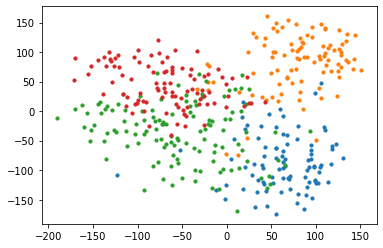

In [19]:
MDS_Result = MDS(centred_df,2)
for i in label_num :
    temp = MDS_Result[label == i]
    plt.scatter(x=temp[:,0],y=temp[:,1],s=10)

In [20]:
pd.DataFrame(MDS_Result)

,0,1
0,79.653134,-25.984306
1,-1.269283,-125.901484
2,78.880410,101.381580
3,65.122259,-81.119057
4,34.454844,-136.278325
...,...,...
403,34.760867,-115.946111
404,-34.186077,9.565877
405,-45.074975,-54.032979
406,133.719213,118.083273


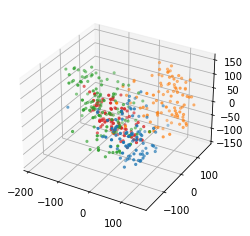

In [21]:
MDS_Result = MDS(centred_df,3)
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d') 
for i in label_num :
    temp = MDS_Result[label == i]
    ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], s=5)  

In [22]:
pd.DataFrame(MDS_Result)

,0,1,2
0,79.653134,-25.984306,31.851668
1,-1.269283,-125.901484,-5.659310
2,78.880410,101.381580,81.057249
3,65.122259,-81.119057,2.742145
4,34.454844,-136.278325,41.163370
...,...,...,...
403,34.760867,-115.946111,5.712740
404,-34.186077,9.565877,4.113060
405,-45.074975,-54.032979,24.598715
406,133.719213,118.083273,39.620505


## t-SNE算法（采用skearn中函数）

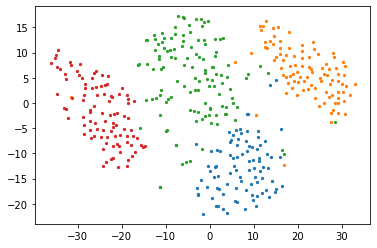

In [23]:
tsne = TSNE(n_components=2 ,random_state=0)  
X_2d = tsne.fit_transform(df)
for i in label_num :
    temp = X_2d[label == i]
    plt.scatter(temp[:, 0], temp[:, 1], s=5)  


In [24]:
pd.DataFrame(X_2d)

,0,1
0,-1.508494,-22.028236
1,0.277970,-9.516426
2,29.076769,-0.030416
3,14.920293,-17.671289
4,3.829377,-16.127720
...,...,...
403,1.214772,-12.650958
404,-9.841883,-5.521832
405,-1.140674,6.568618
406,22.503975,7.189423


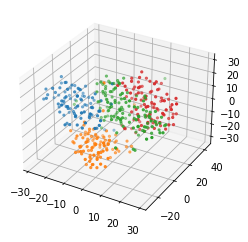

In [25]:
tsne = TSNE(n_components=3 ,random_state=0)  
X_3d = tsne.fit_transform(df)
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d') 
for i in label_num :
    temp = X_3d[label == i]
    ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], s=5)  

In [26]:
pd.DataFrame(X_3d)

,0,1,2
0,-1.135612,-15.578084,-0.808352
1,-1.458159,-9.917426,16.609097
2,6.067926,-23.972282,-10.119480
3,-28.185875,-16.074564,18.112934
4,-8.623219,-20.887428,15.802938
...,...,...,...
403,-3.606115,-16.048019,14.117353
404,11.627268,5.200423,-12.811044
405,6.241803,-1.720730,5.645647
406,-15.141407,-13.969590,-18.219048
